In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_excel("KPMG_final.xlsx",sheet_name="CustomerDemographic",header=1)

In [4]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
df1=df1[["gender","past_3_years_bike_related_purchases",'DOB','job_industry_category','wealth_segment','owns_car']]

In [6]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car
0,F,93,1953-10-12,Health,Mass Customer,Yes
1,Male,81,1980-12-16,Financial Services,Mass Customer,Yes
2,Male,61,1954-01-20,Property,Mass Customer,Yes
3,Male,33,1961-10-03,IT,Mass Customer,No
4,Female,56,1977-05-13,NaN,Affluent Customer,Yes


In [7]:
df1['Age']=df1['DOB'].apply(lambda x: pd.to_datetime('today').year - x.year )

In [8]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,Age
0,F,93,1953-10-12,Health,Mass Customer,Yes,67.0
1,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,40.0
2,Male,61,1954-01-20,Property,Mass Customer,Yes,66.0
3,Male,33,1961-10-03,IT,Mass Customer,No,59.0
4,Female,56,1977-05-13,NaN,Affluent Customer,Yes,43.0


In [132]:
df1['Age'].max()

177.0

In [100]:
len(df1[df1['Age']<100])

3912

In [101]:
len(df1)

4000

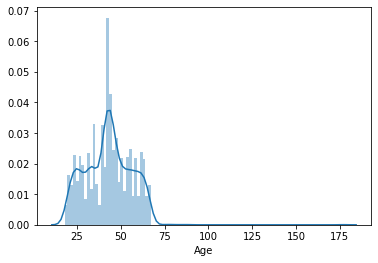

In [54]:
sb.distplot(df1['Age'],bins=100)

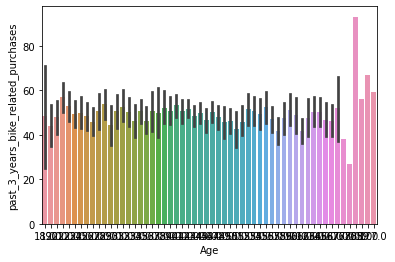

In [21]:
sb.barplot(x=df1['Age'],y=df1['past_3_years_bike_related_purchases'])

In [9]:
def grouper(age):
    if age<=25:
        return "young"
    elif age>25 and age<=50:
        return "adult"
    elif age>50 and age<=75:
        return "senior_citizen"
    else:
        return "old"

In [134]:
df1.DOB.isnull().sum()

87

In [145]:
dfx=df1[df1['gender']=="U"]

In [146]:
len(dfx)

88

In [135]:
df1.Age.isnull().sum()

87

In [136]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,Age
0,F,93,1953-10-12,Health,Mass Customer,Yes,67.0
1,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,40.0
2,Male,61,1954-01-20,Property,Mass Customer,Yes,66.0
3,Male,33,1961-10-03,IT,Mass Customer,No,59.0
4,Female,56,1977-05-13,NaN,Affluent Customer,Yes,43.0


In [137]:
len(df1)

4000

In [10]:
df1['Age_group']=df1['Age'].apply(lambda x:grouper(x))

In [11]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,Age,Age_group
0,F,93,1953-10-12,Health,Mass Customer,Yes,67.0,senior_citizen
1,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,40.0,adult
2,Male,61,1954-01-20,Property,Mass Customer,Yes,66.0,senior_citizen
3,Male,33,1961-10-03,IT,Mass Customer,No,59.0,senior_citizen
4,Female,56,1977-05-13,NaN,Affluent Customer,Yes,43.0,adult


In [150]:
df1.Age.isnull().sum()

87

In [110]:
len(df1)

4000

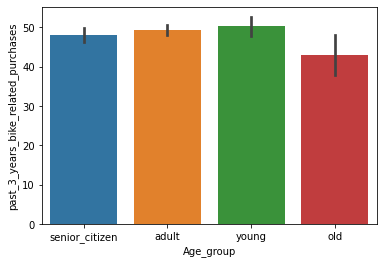

In [112]:
sb.barplot(x=df1['Age_group'],y=df1['past_3_years_bike_related_purchases'])

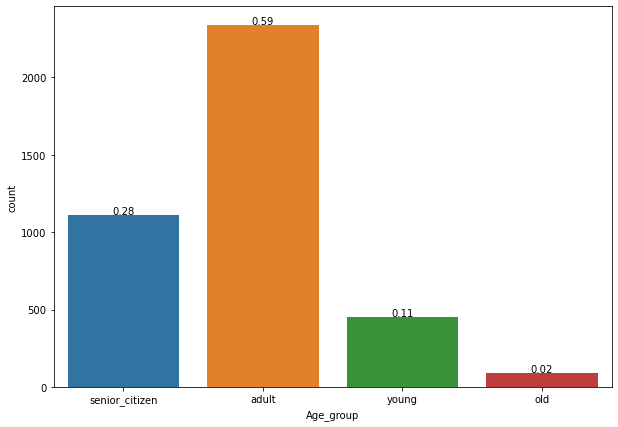

In [16]:

plt.figure(figsize=(10,7))
ax=sb.countplot(df1['Age_group'])
total=len(df1)- df1.Age_group.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

In [151]:
df1.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [113]:
df1.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [114]:
sex="Female"
sex[0]

'F'

In [3]:
def corr(sex):
    if sex[0]=="F":
        return "F"
    if sex[0]=="M":
        return "M"
    if sex[0]=="U":
        return "U"

In [164]:
df1['gender']=df1['gender'].apply(lambda x:corr(x))

In [165]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,Age,Age_group
0,F,93,1953-10-12,Health,Mass Customer,Yes,67.0,senior_citizen
1,M,81,1980-12-16,Financial Services,Mass Customer,Yes,40.0,adult
2,M,61,1954-01-20,Property,Mass Customer,Yes,66.0,senior_citizen
3,M,33,1961-10-03,IT,Mass Customer,No,59.0,senior_citizen
4,F,56,1977-05-13,NaN,Affluent Customer,Yes,43.0,adult


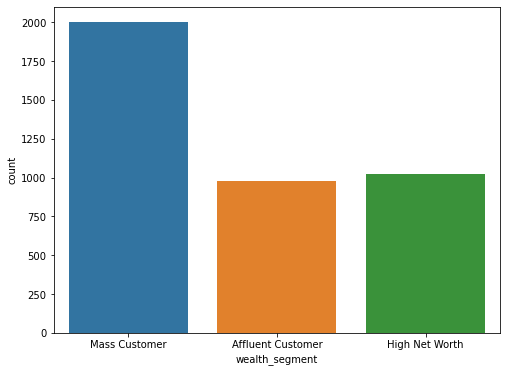

In [27]:
plt.figure(figsize=(8,6))
ax=sb.countplot(df1['wealth_segment'])


In [166]:
df1.gender.unique()

array(['F', 'M', 'U'], dtype=object)

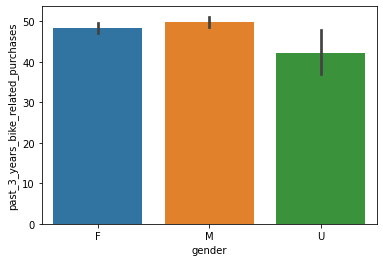

In [167]:
sb.barplot(x=df1['gender'],y=df1['past_3_years_bike_related_purchases'])

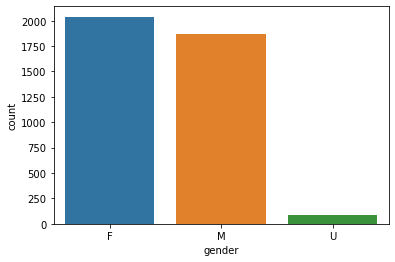

In [169]:
sb.countplot(df1['gender'])

In [170]:
grp=df1.groupby(df1['owns_car'])

In [172]:
grp.describe()

past_3_years_bike_related_purchases                                   \
                                       count       mean        std  min   25%   
owns_car                                                                        
No                                    1976.0  49.277834  28.709302  0.0  24.0   
Yes                                   2024.0  48.511364  28.722613  0.0  23.0   

                               Age                                          \
           50%   75%   max   count       mean        std   min   25%   50%   
owns_car                                                                     
No        48.0  74.0  99.0  1939.0  42.928314  13.073797  18.0  33.0  43.0   
Yes       48.0  73.0  99.0  1974.0  43.009625  12.521099  18.0  34.0  43.0   

                       
           75%    max  
owns_car               
No        52.0  177.0  
Yes       52.0   77.0

In [175]:
df_car_yes=grp.get_group('Yes')

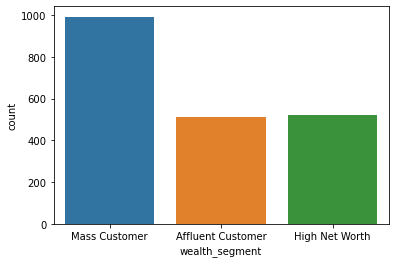

In [179]:
sb.countplot(df_car_yes['wealth_segment'])

In [177]:
df_car_no=grp.get_group('No')

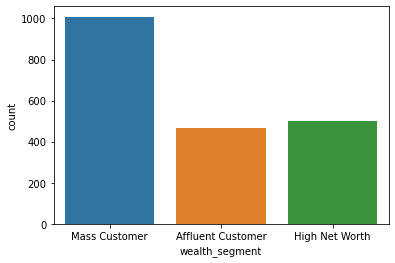

In [180]:
sb.countplot(df_car_no['wealth_segment'])

In [124]:
df1['past_3_years_bike_related_purchases'].mean()

48.89

In [125]:
df1['gender'].isnull().sum()

88

In [181]:
grp2=df1.groupby(df1['wealth_segment'])

In [183]:
df1_mass=grp2.get_group('Mass Customer')

In [184]:
grp2.describe()

past_3_years_bike_related_purchases                        \
                                                count       mean        std   
wealth_segment                                                                
Affluent Customer                               979.0  48.847804  28.644074   
High Net Worth                                 1021.0  47.287953  28.406492   
Mass Customer                                  2000.0  49.728500  28.885013   

                                                   Age                        \
                   min   25%   50%   75%   max   count       mean        std   
wealth_segment                                                                 
Affluent Customer  0.0  23.0  48.0  74.0  99.0   963.0  42.838006  13.453961   
High Net Worth     0.0  22.0  46.0  71.0  99.0   996.0  43.066265  12.503733   
Mass Customer      0.0  25.0  49.0  75.0  99.0  1954.0  42.984647  12.616311   

                                                  
                    min   25%   50%   75%    max  
wealth_segment                                    
Affluent Customer  18.0  33.0  43.0  53.0  177.0  
High Net Worth     18.0  33.0  43.0  53.0   77.0  
Mass Customer      18.0  34.0  43.0  52.0   85.0

In [17]:
df2=pd.read_excel("KPMG_final.xlsx",sheet_name="NewCustomerList",header=1)

In [3]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [18]:
df2=df2[['gender','past_3_years_bike_related_purchases','DOB','job_industry_category','wealth_segment','owns_car','state']]

In [19]:
df2.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state
0,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD
1,Male,69,1970-03-22,Property,Mass Customer,No,NSW
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,QLD
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,NSW


In [20]:
df2['Age']=df2['DOB'].apply(lambda x:pd.to_datetime('today').year-x.year)

In [21]:
df2.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,Age
0,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,63.0
1,Male,69,1970-03-22,Property,Mass Customer,No,NSW,50.0
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC,46.0
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,QLD,41.0
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,NSW,55.0


In [9]:
df2.Age.isnull().sum()

17

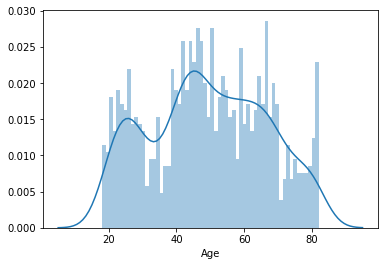

In [10]:
sb.distplot(df2['Age'],bins=60)

In [22]:
df2['Age_group']=df2['Age'].apply(lambda x:grouper(x))

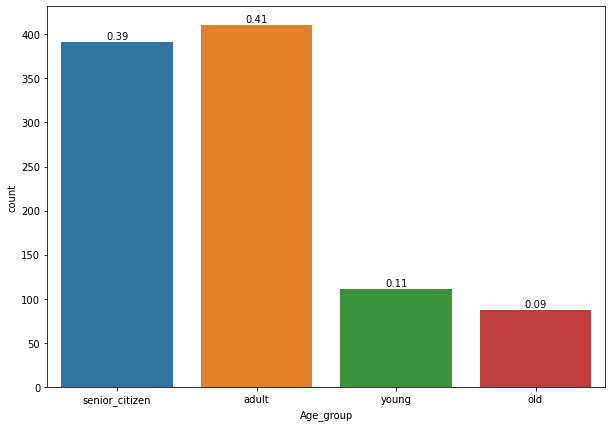

In [24]:

plt.figure(figsize=(10,7))
ax=sb.countplot(df2['Age_group'])
total=len(df2)- df2.Age_group.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

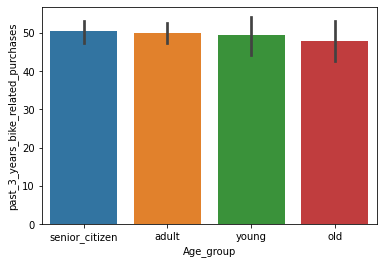

In [13]:
sb.barplot(x=df2['Age_group'],y=df2['past_3_years_bike_related_purchases'],data=df)

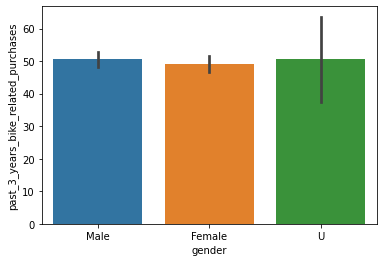

In [15]:
sb.barplot(x=df2['gender'],y=df2['past_3_years_bike_related_purchases'])

In [17]:
df2.gender.isnull().sum()

0

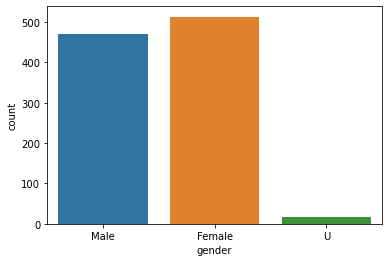

In [19]:
sb.countplot(df2['gender'])

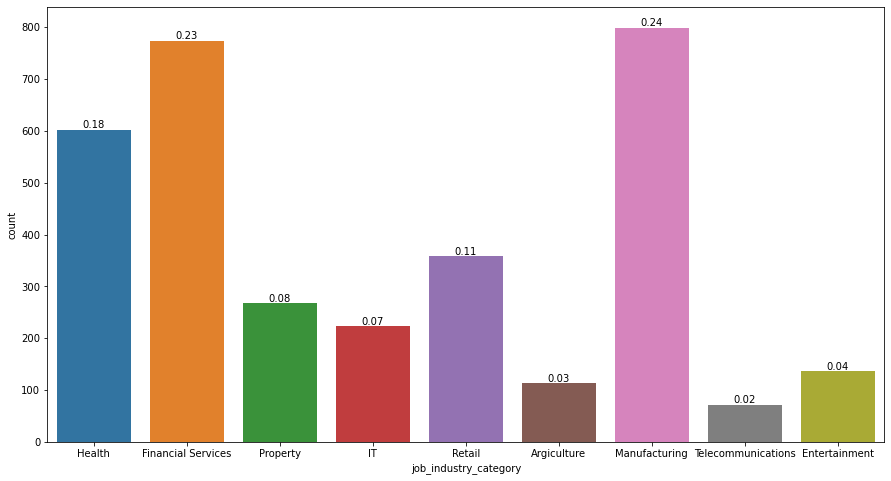

In [25]:

plt.figure(figsize=(15,8))
ax=sb.countplot(df1['job_industry_category'])
total=len(df1)- df1.job_industry_category.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


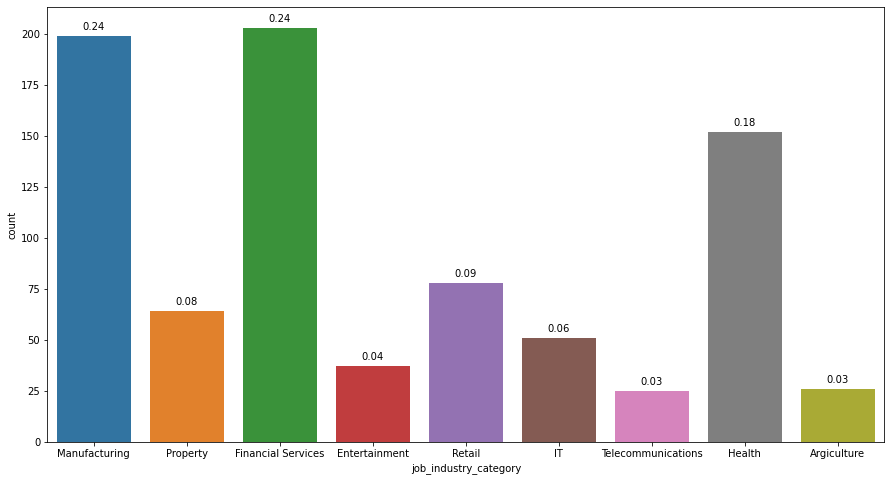

In [30]:

plt.figure(figsize=(15,8))
ax=sb.countplot(df2['job_industry_category'])
total=len(df2)- df2.job_industry_category.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


In [43]:
df3=pd.read_excel("KPMG_final.xlsx",sheet_name="CustomerAddress",header=1)

In [44]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [37]:
len(df1)

4000

In [40]:
len(df3)

4000

In [45]:
df1['State']=df3['state']

In [46]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,Age,State
0,F,93,1953-10-12,Health,Mass Customer,Yes,67.0,New South Wales
1,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,40.0,New South Wales
2,Male,61,1954-01-20,Property,Mass Customer,Yes,66.0,QLD
3,Male,33,1961-10-03,IT,Mass Customer,No,59.0,New South Wales
4,Female,56,1977-05-13,NaN,Affluent Customer,Yes,43.0,VIC


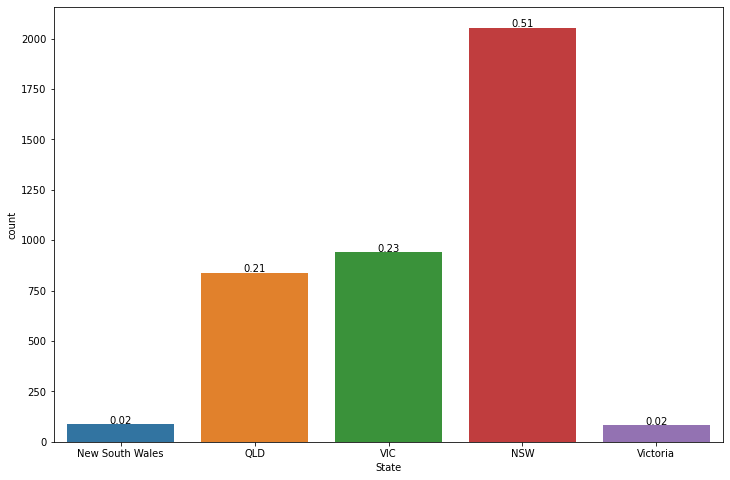

In [53]:
plt.figure(figsize=(12,8))
ax=sb.countplot(df1['State'])
total=len(df1)- df1.State.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


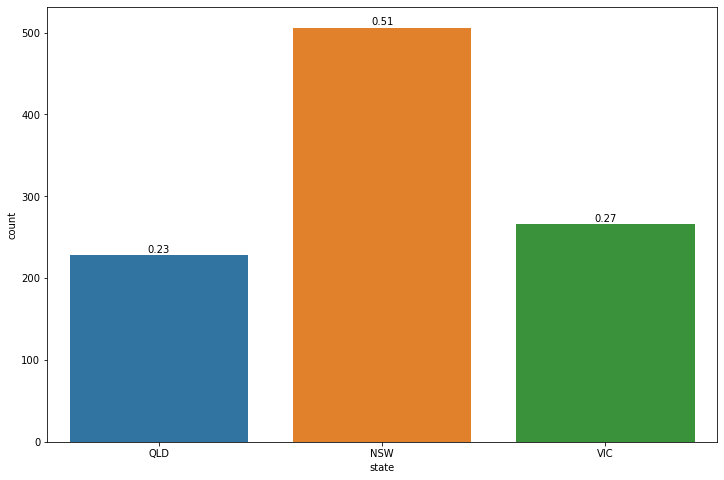

In [55]:
plt.figure(figsize=(12,8))
ax=sb.countplot(df2['state'],hue=df['owns_car'])
total=len(df2)- df2.state.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


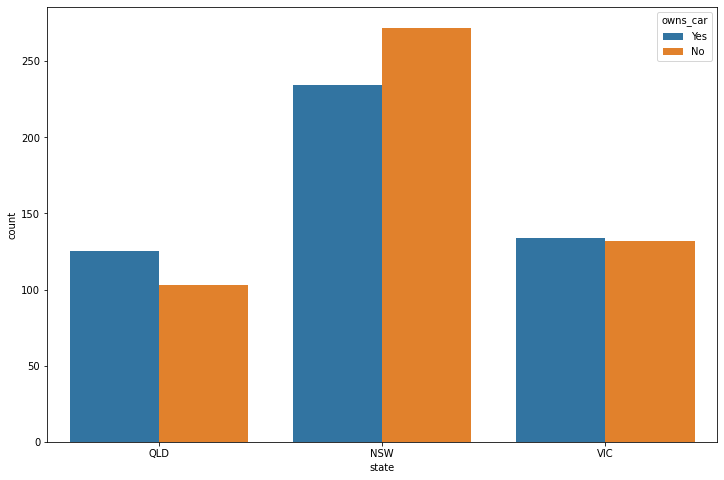

In [57]:
plt.figure(figsize=(12,8))
ax=sb.countplot(df2['state'],hue=df2['owns_car'])

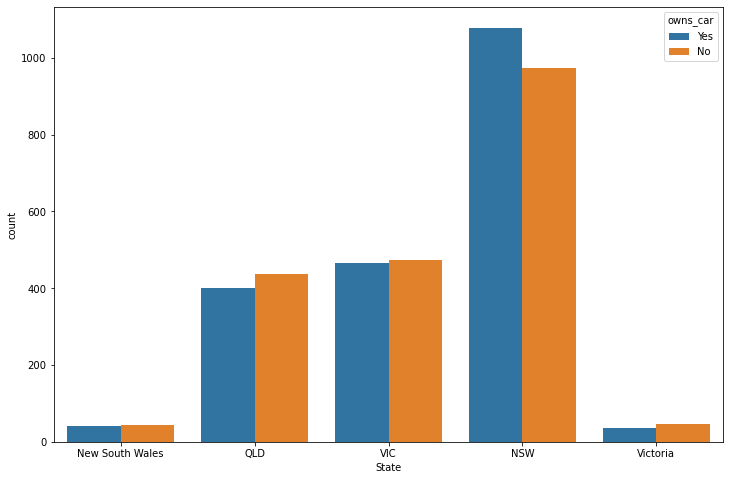

In [58]:
plt.figure(figsize=(12,8))
ax=sb.countplot(df1['State'],hue=df1['owns_car'])

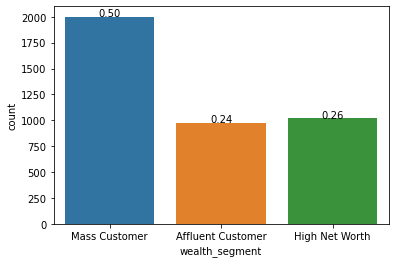

In [61]:
ax=sb.countplot(df1['wealth_segment'])
total=len(df1)- df1.wealth_segment.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

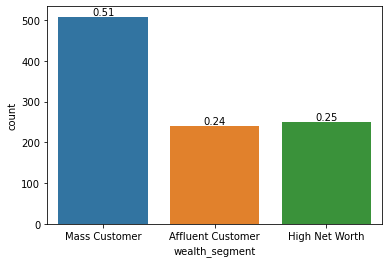

In [62]:
ax=sb.countplot(df2['wealth_segment'])
total=len(df2)- df2.wealth_segment.isnull().sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

In [63]:
df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,Age,State
0,F,93,1953-10-12,Health,Mass Customer,Yes,67.0,New South Wales
1,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,40.0,New South Wales
2,Male,61,1954-01-20,Property,Mass Customer,Yes,66.0,QLD
3,Male,33,1961-10-03,IT,Mass Customer,No,59.0,New South Wales
4,Female,56,1977-05-13,NaN,Affluent Customer,Yes,43.0,VIC


In [64]:
df2.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,Age,Age_group
0,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,63.0,senior_citizen
1,Male,69,1970-03-22,Property,Mass Customer,No,NSW,50.0,adult
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC,46.0,adult
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,QLD,41.0,adult
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,NSW,55.0,senior_citizen
